In [4]:
import math
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import plotly.express as px
import joblib

In [8]:
def dashboard(input):
    file = pd.read_csv(input)
    # Change form : %Y-%m-%d %H:%M:%S
    file[' Measure Date Time'] = pd.to_datetime(file[' Measure Date Time'], format = "%Y-%m-%d %H:%M:%S")
    
    # Prepare data
    def cholesterol(x):
        if x == '\xad':
            return np.nan
        if not isinstance(x, float):
            return float(x.strip())
        return x
        
    def checkNotNan(x):
        if isinstance(x, float):
            return not math.isnan(x)
        return True
    file1 = file.copy()
    file1[' BMI'] = file1[' BMI'].fillna(file1.groupby('SubjectID')[' BMI'].transform('mean'))
    file1[' Body Age'] = file1[' Body Age'].fillna(file1.groupby('SubjectID')[' Body Age'].transform('mean'))
    file1['Antihypertensive'] = file1['Antihypertensive'].fillna('None') 
    file1['Antidepressant'] = file1['Antidepressant'].fillna('None') 
    file1['Osteoporosis drug'] = file1['Osteoporosis drug'].fillna('None')   
    file1['Antidiabetic drug'] = file1['Antidiabetic drug'].fillna('None')              
    file1['Other'] = file1['Other'].fillna('None')   
    file1[' Body Fat Percentage'] = file1[' Body Fat Percentage'].fillna(file1.groupby('SubjectID')[' Body Fat Percentage'].transform('mean'))
    file1['Total cholesterol'] = file1['Total cholesterol'].apply(cholesterol)             
    file1['Total cholesterol'] = file1['Total cholesterol'].fillna(file1['Total cholesterol'].mean()) 
    file1[' Systolic Pressure'] = file1[' Systolic Pressure'].fillna(file1.groupby('SubjectID')[' Systolic Pressure'].transform('mean'))
    file1[' Diastolic Pressure'] = file1[' Diastolic Pressure'].fillna(file1.groupby('SubjectID')[' Diastolic Pressure'].transform('mean'))
    file1[' Mean Arterial Pressure'] = file1[' Mean Arterial Pressure'].fillna(file1.groupby('SubjectID')[' Mean Arterial Pressure'].transform('mean'))
    file1[' Pulse Rate'] = file1[' Pulse Rate'].fillna(file1.groupby('SubjectID')[' Pulse Rate'].transform('mean'))
    file1['Blood sugar'] = file1['Blood sugar'].fillna(file1['Blood sugar'].mean()) 
    file1 = file1.dropna()

    # Dummy
    data_dummied = pd.concat([file1, pd.get_dummies(file1['Gender'], prefix='Gender')], axis=1)
    data_dummied = data_dummied.drop(['Gender'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['Smoking'], prefix='Smoking')], axis=1)
    data_dummied = data_dummied.drop(['Smoking'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['Drinking'], prefix='Drinking')], axis=1)
    data_dummied = data_dummied.drop(['Drinking'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['Antihypertensive'], prefix='Antihypertensive')], axis=1)
    data_dummied = data_dummied.drop(['Antihypertensive'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['Antidepressant'], prefix='Antidepressant')], axis=1)
    data_dummied = data_dummied.drop(['Antidepressant'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['Osteoporosis drug'], prefix='Osteoporosis drug')], axis=1)
    data_dummied = data_dummied.drop(['Osteoporosis drug'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['Antidiabetic drug'], prefix='Antidiabetic drug')], axis=1)
    data_dummied = data_dummied.drop(['Antidiabetic drug'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['Other'], prefix='Other')], axis=1)
    data_dummied = data_dummied.drop(['Other'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['Health status'], prefix='Health status')], axis=1)
    data_dummied = data_dummied.drop(['Health status'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['Exercise function'], prefix='Exercise function')], axis=1)
    data_dummied = data_dummied.drop(['Exercise function'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['Nutrition'], prefix='Nutrition')], axis=1)
    data_dummied = data_dummied.drop(['Nutrition'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['Cognitive function'], prefix='Cognitive function')], axis=1)
    data_dummied = data_dummied.drop(['Cognitive function'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['High blood pressure'], prefix='High blood pressure')], axis=1)
    data_dummied = data_dummied.drop(['High blood pressure'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['Exercise guidance'], prefix='Exercise guidance')], axis=1)
    data_dummied = data_dummied.drop(['Exercise guidance'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['Nutrition guidance'], prefix='Nutrition guidance')], axis=1)
    data_dummied = data_dummied.drop(['Nutrition guidance'], axis=1)
    data_dummied = pd.concat([data_dummied, pd.get_dummies(file1['Life guidance'], prefix='Life guidance')], axis=1)
    data_dummied = data_dummied.drop(['Life guidance'], axis=1)

    # Check columns
    all_col = ['SubjectID', ' Measure Date Time', 'Age', 'Height', 'Body weight', ' BMI', ' Body Age', ' Body Fat Percentage', 'Total cholesterol', 
    ' Systolic Pressure', ' Diastolic Pressure', ' Mean Arterial Pressure', ' Pulse Rate', 'Blood sugar', 'Gender_Female', 'Gender_Male', 'Smoking_no', 'Smoking_yes',
    'Drinking_no', 'Drinking_yes', 'Antihypertensive_Amlodipine', 'Antihypertensive_Azilva、Amlodipine', 'Antihypertensive_None', 'Antihypertensive_Olmesartan, Nifedipine',
    'Antihypertensive_Trichlormethiazide、Amlodipine', 'Antihypertensive_Valsartan、Nifedipine', 'Antidepressant_None', 'Osteoporosis drug_None',
    'Antidiabetic drug_Gractive', 'Antidiabetic drug_None', 'Other_Crestor, Halcyon, Magnesium Oxide, Montelukast, Loxoprofen', 'Other_Donepezil, Famotidine, Lepamidine,Ttriazolam',
    'Other_None', 'Other_Silodosin, Rosuvastatin, Magnesium oxide', 'Other_Tsumura Kakkonto extract', 'Other_Zopiclone, Full Bath Titanium', 'Health status_Observation required',
    'Health status_good', 'Exercise function_Observation required', 'Exercise function_good', 'Nutrition_Observation required', 'Nutrition_good', 'Cognitive function_Observation required',
    'Cognitive function_good', 'High blood pressure_Nothing', 'High blood pressure_Yes', 'Exercise guidance_Aggressive exercise', 'Exercise guidance_Mild exercise',
    'Exercise guidance_Nothing', 'Nutrition guidance_Nothing', 'Nutrition guidance_Nutritional guidance for improving eating habits', 'Life guidance_Guidance to enhance visuospatial cognitive function',
    'Life guidance_Guidance to increase physical activity', 'Life guidance_Nothing']
    data_dummied = data_dummied.assign(**{col : 0 for col in np.setdiff1d(all_col,data_dummied.columns.values)})
    
    # Move column Measure Date Time
    col = data_dummied.pop(' Measure Date Time')
    data_dummied.insert(1, ' Measure Date Time',col)
    data_dummied

    # Normalization
    data_scaled = data_dummied.copy()
    scaler = StandardScaler()
    scaler.fit(data_dummied[data_scaled.columns[2:14]])
    data_scaled[data_scaled.columns[2:14]] = scaler.transform(data_scaled[data_scaled.columns[2:14]])
    data_scaled.describe()

    # Find mean of SubjectID
    data_scaled_means = data_scaled.drop([' Measure Date Time'], axis = 1).groupby('SubjectID').mean()
    data_scaled_means = data_scaled_means.drop(['High blood pressure_Yes','High blood pressure_Nothing'], axis=1)

    # Load Model
    loaded_model = joblib.load('model.sav')
    testpred = loaded_model.predict(data_scaled_means)
    testpred

    # display
    id = list(dict.fromkeys(data_dummied['SubjectID']))
    print('ID : ', id[0])
    gender = list(dict.fromkeys(data_dummied['Gender_Female']))

    if gender[0] == 1:
        print('Gender : Female')
    else:
        print('Gender : Man')

    age = list(dict.fromkeys(data_dummied['Age']))
    print('Age : ', age[0])
    height = data_dummied['Height'].mean()
    print('Height : ', height)
    weight = data_dummied['Body weight'].mean()
    print('Weight : ', weight)
    bmi = data_dummied[' BMI'].mean()
    print('BMI : ', bmi)
    sys = data_dummied[' Systolic Pressure'].mean()
    print('Systolic BP :', sys)
    dia = data_dummied[' Diastolic Pressure'].mean()
    print('Diastolic BP :', dia)
    Map = data_dummied[' Mean Arterial Pressure'].mean()
    print('Mean Arterial Pressure :', Map)
    print('---------------------------------------------')
    if testpred == 1:
        print('Blood pressure result : High blood pressure')
    else:
        print('Blood pressure result : Normal blood pressure')

    

    exer_agg = list(dict.fromkeys(data_dummied['Exercise guidance_Aggressive exercise']))
    if exer_agg[0] == 1:
        print('Exercise guidance : Aggressive exercise')
    else:
        pass

    exer_mil = list(dict.fromkeys(data_dummied['Exercise guidance_Mild exercise']))
    if exer_mil[0] == 1:
        print('Exercise guidance : Mild exercise')
    else:
        pass

    exer_not = list(dict.fromkeys(data_dummied['Exercise guidance_Nothing']))
    if exer_not[0] == 1:
        print('Exercise guidance : Nothing')
    else:
        pass
    
    Nutrition_guidance = list(dict.fromkeys(data_dummied['Nutrition guidance_Nothing']))
    if Nutrition_guidance[0] == 1:
        print('Nutrition guidance : Nothing')
    else:
        print('Nutrition guidance : Nutrition guidance Nutritional guidance for improving eating habits')

    Life_guidance_enhance = list(dict.fromkeys(data_dummied['Life guidance_Guidance to enhance visuospatial cognitive function']))
    if Life_guidance_enhance[0] == 1:
        print('Life guidance : Life guidance Guidance to enhance visuospatial cognitive function')
    else:
        pass
    Life_guidance_increase = list(dict.fromkeys(data_dummied['Life guidance_Guidance to increase physical activity']))
    if Life_guidance_increase[0] == 1:
        print('Life guidance : Life guidance Guidance to increase physical activity')
    else:
        pass
    Life_guidance_nothing = list(dict.fromkeys(data_dummied['Life guidance_Nothing']))
    if Life_guidance_nothing[0] == 1:
        print('Life guidance : Nothing')
    else:
        pass
    
    date = data_dummied[' Measure Date Time']
    systolic = data_dummied[' Systolic Pressure']
    diastolic = data_dummied[' Diastolic Pressure']
    map = data_dummied[' Mean Arterial Pressure']
    pulse = data_dummied[' Pulse Rate']
    #plot pressure
    fig,ax = plt.subplots(2,1, figsize=(10, 10))
    ax[0].plot(date, systolic)
    ax[0].plot(date, diastolic)
    ax[0].plot(date, map)
    ax[0].legend(['Systolic Pressure', 'Diastolic Pressure', 'Mean Arterial Pressure'])
    ax[0].set(title='Blood Pressure By DateTime',xlabel='Date',ylabel='Pressure')

    #plot pulse rate
    ax[1].plot(date, pulse)
    ax[1].set(title='Pulse Rate By DateTime',xlabel='Date',ylabel='Pulse Rate')
    plt.show()


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


ID :  001SR1707005101
Gender : Man
Age :  80
Height :  170.0
Weight :  65.0
BMI :  22.5
Systolic BP : 93.5
Diastolic BP : 68.83333333333333
Mean Arterial Pressure : 77.0
---------------------------------------------
Blood pressure result : High blood pressure
Exercise guidance : Aggressive exercise
Nutrition guidance : Nothing
Life guidance : Nothing


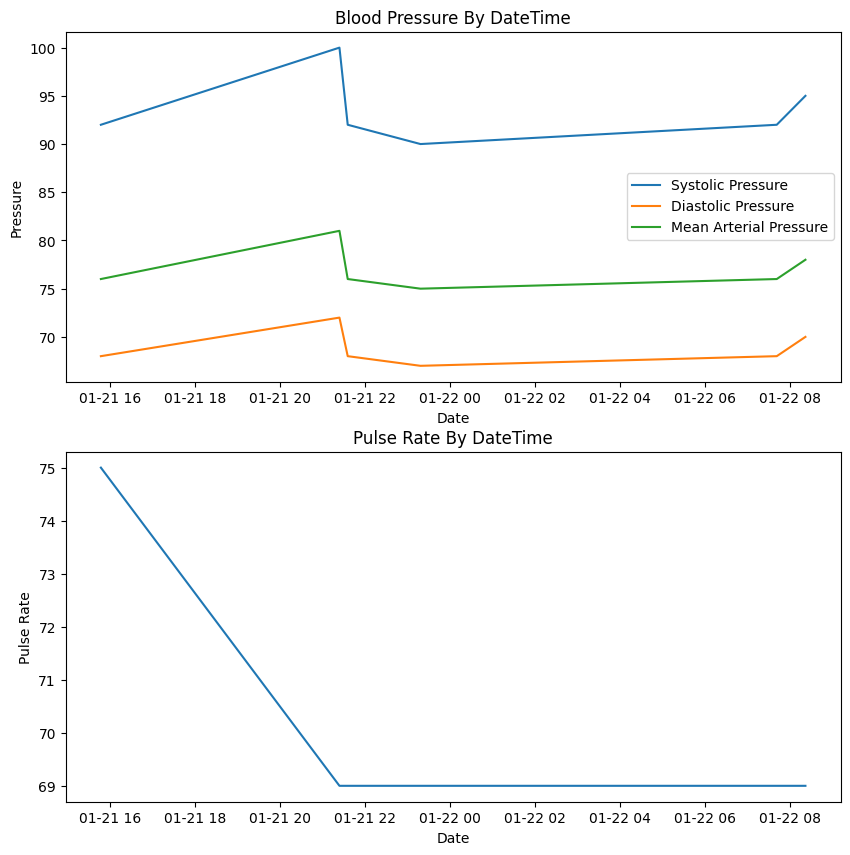

In [9]:
dashboard('test2.csv')